In [195]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import LPR
#https://youtu.be/9dyaI3GyUtc?si=p2ld13VfrY6RH7pi

In [196]:
def plot_image(img, grayscale=True):
    plt.axis('off')
    if grayscale:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [197]:
idx = 1
lpr = LPR.LPR()

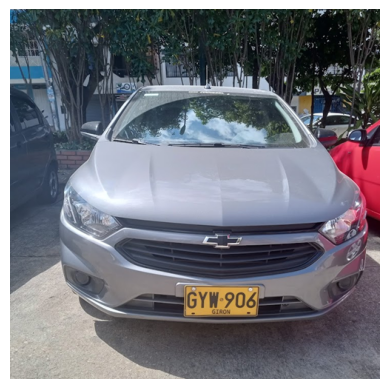

In [198]:
img = cv2.imread(f"./imgs/{idx:03}.png")
contraste = 1
brillo = 1
img = cv2.convertScaleAbs(img, alpha=contraste, beta=brillo)
plot_image(img, False)

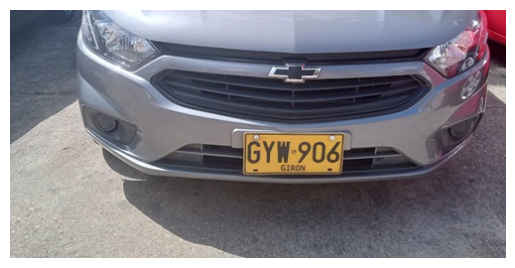

In [199]:
altura, ancho, _ = img.shape
img = img[altura//2:, :]

plot_image(img, False)

In [200]:
lower_yellow = np.array([15, 80, 80])  # Ajusta estos valores
upper_yellow = np.array([35, 255, 255])  # Ajusta estos valores

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Crear una máscara para los píxeles amarillos
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

contornos, jerarquia = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Buscar el contorno más grande (presumiblemente la placa)
contorno_placa = max(contornos, key=cv2.contourArea)

# Obtener las coordenadas del rectángulo que rodea la placa
x, y, w, h = cv2.boundingRect(contorno_placa)

# Dibujar un rectángulo verde alrededor de la placa
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar la img con el rectángulo verde
cv2.imshow('Placa Marcada', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

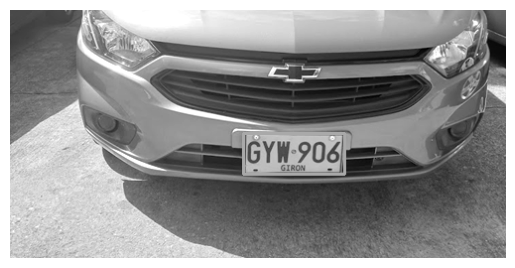

In [201]:
contraste = 1
brillo = 30

gray = lpr.grayscale(img)
gray = cv2.convertScaleAbs(gray, alpha=contraste, beta=brillo)
plot_image(gray)

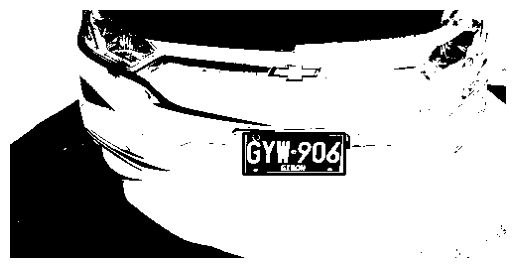

In [202]:
thresh = lpr.apply_threshold(gray)
plot_image(thresh)

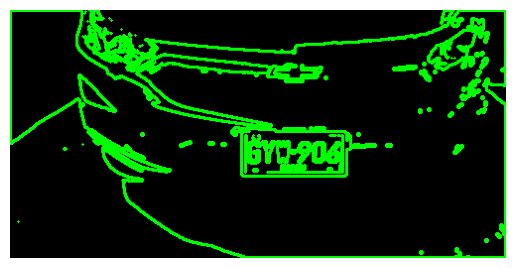

In [203]:
contours = lpr.find_contours(thresh)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , contours, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

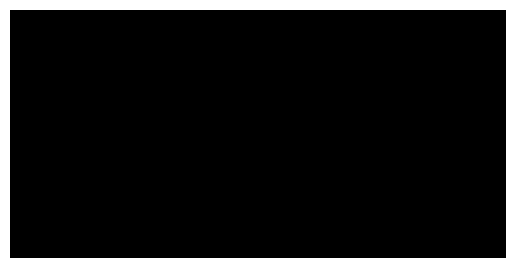

In [204]:
candidates = lpr.filter_candidates(contours)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , candidates, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

In [205]:
license = lpr.get_lowest_candidate(candidates)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , [license], -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

ValueError: attempt to get argmax of an empty sequence

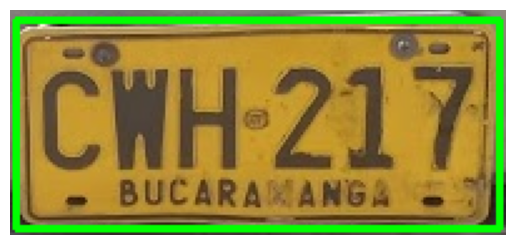

In [ ]:
cropped = lpr.crop_license_plate(gray, license)
cropped2 = lpr.crop_license_plate(img, license)
plot_image(cropped2, False)

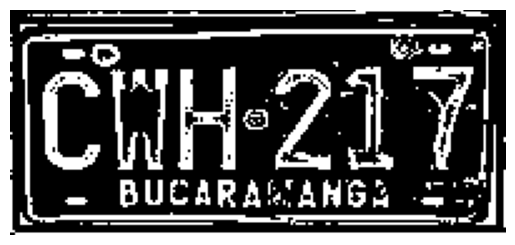

In [ ]:
thresh_cropped = lpr.apply_adaptive_threshold(cropped)
plot_image(thresh_cropped)

In [ ]:
clear_border = lpr.clear_border(thresh_cropped)
final = lpr.invert_image(clear_border)
plot_image(final)

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>